## Model 1: Improved Pipeline with TF-IDF + Logistic Regression (with Hyperparameter Tuning)
Enhance the baseline by optimizing TF-IDF vectorizer and Logistic Regression hyperparameters using GridSearchCV for better performance.

## Steps:
# 1.Import libraries and load preprocessed data
  (Preprocessing including cleaning, stopword removal, and stemming/lemmatization was done beforehand.)
# 2.Vectorization & Model Pipeline:
  TF-IDF Vectorizer with tunable parameters like max_features and ngram_range
  Logistic Regression with tunable regularization parameter C, solver, and penalty
# 3.Hyperparameter Tuning:
  Use GridSearchCV to find best combination of TF-IDF and Logistic Regression parameters
# 4.Model Training:
  Train the pipeline on training data with best hyperparameters found
# 5.Evaluation:
  Evaluate on test set using accuracy, classification report, and confusion matrix
#  Purpose:

Leverage automated hyperparameter tuning to improve classification accuracy beyond the initial baseline model. This step optimizes feature representation and classifier settings, resulting in a more robust and accurate sentiment classifier.



 ## Load the cleaned dataset

# global imports


In [1]:
import pandas as pd
import re


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [2]:


df = pd.read_csv("data/cleaned_amazon_reviews_final.csv")
print(f"Loaded dataset shape: {df.shape}")
print(df.head)
df.columns


Loaded dataset shape: (20063, 11)
<bound method NDFrame.head of                                                     name       asins   brand  \
0      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4      Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
...                                                  ...         ...     ...   
20058  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  B018T075DC  Amazon   
20059  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  B018T075DC  Amazon   
20060  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  B018T075DC  Amazon   
20061  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...  B018T075DC  Amazon   
20062  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'sourceURLs', 'label',
       'clean_text'],
      dtype='object')

# Prepare the Data

In [3]:
X = df['clean_text']
y = df['label']


# Train test split 

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorization

In [5]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Train Logistic Regression Model

In [6]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)), 
    ('clf', LogisticRegression(max_iter=300))  
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=300))])

In [7]:
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   2.9s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   2.7s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   2.7s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   2.7s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   2.5s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   2.2s
[CV] END clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs, tfidf__max_features=5000, tfidf__ngram_range=(1, 2); total time=   5.6s
[CV] END clf__C=0.1, clf__penalty

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=10000,
                                                        ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(max_iter=300))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['lbfgs', 'liblinear'],
                         'tfidf__max_features': [5000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [8]:
print("Best params:", grid_search.best_params_)

Best params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}


# Model Prediction and Evaluation

In [9]:
best_model = grid_search.best_estimator_

In [10]:
y_pred = best_model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9419386992275106


# Detailed Classification Report and Visualization


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       240
           1       0.61      0.33      0.43       177
           2       0.96      0.99      0.97      3596

    accuracy                           0.94      4013
   macro avg       0.79      0.66      0.71      4013
weighted avg       0.93      0.94      0.93      4013



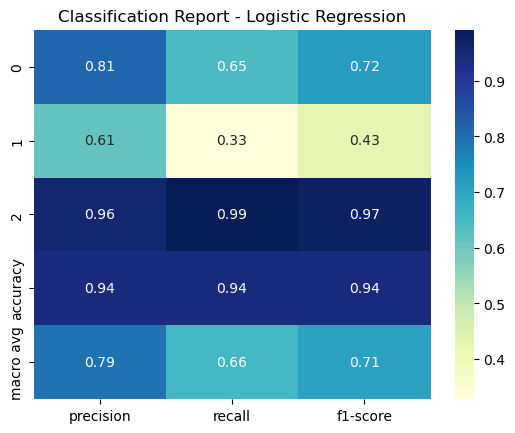

In [12]:
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report - Logistic Regression')
plt.show()

# COnfusion Matrix

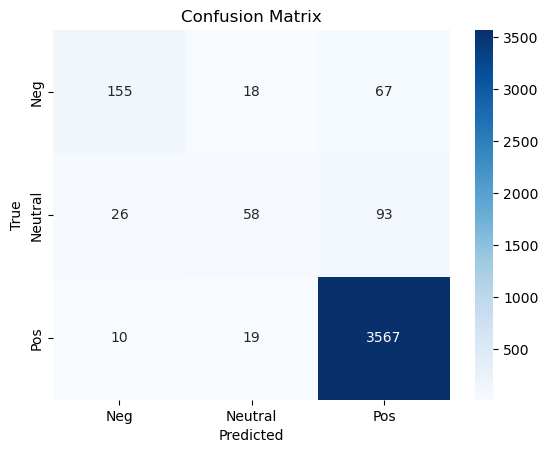

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg', 'Neutral', 'Pos'],
            yticklabels=['Neg', 'Neutral', 'Pos'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [14]:

joblib.dump(pipeline, 'data/sentiment_pipeline.joblib')
print("✅ Pipeline saved as sentiment_pipeline.joblib")

✅ Pipeline saved as sentiment_pipeline.joblib
